<a href="https://colab.research.google.com/github/aurorali17/STA365/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 1

In [ ]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
import pandas as pd
import requests
import random
import os

os.chdir('/content/drive/MyDrive')

data = pd.read_csv("bodyfat.csv")
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
import numpy as np
import pymc as pm
X = data[['Weight', 'Height', 'Abdomen']].to_numpy()
y = data['BodyFat'].to_numpy().reshape(-1, 1)
n, p = X.shape

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # half normal
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

with MLR:
    idata = pm.sample()


In [14]:
predictors = ['Weight', 'Height', 'Abdomen']
X = data[predictors].values
y = data['BodyFat'].values
n, p = X.shape

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros(p), cov=np.eye(p)*10, shape=p)
    sigma = pm.HalfNormal('sigma', sigma=10)
    mu = pm.math.dot(X, betas)
    y_obs = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
with MLR:
    trace = pm.sample(1000, tune=1000, chains=4, return_inferencedata=True)

PART 2

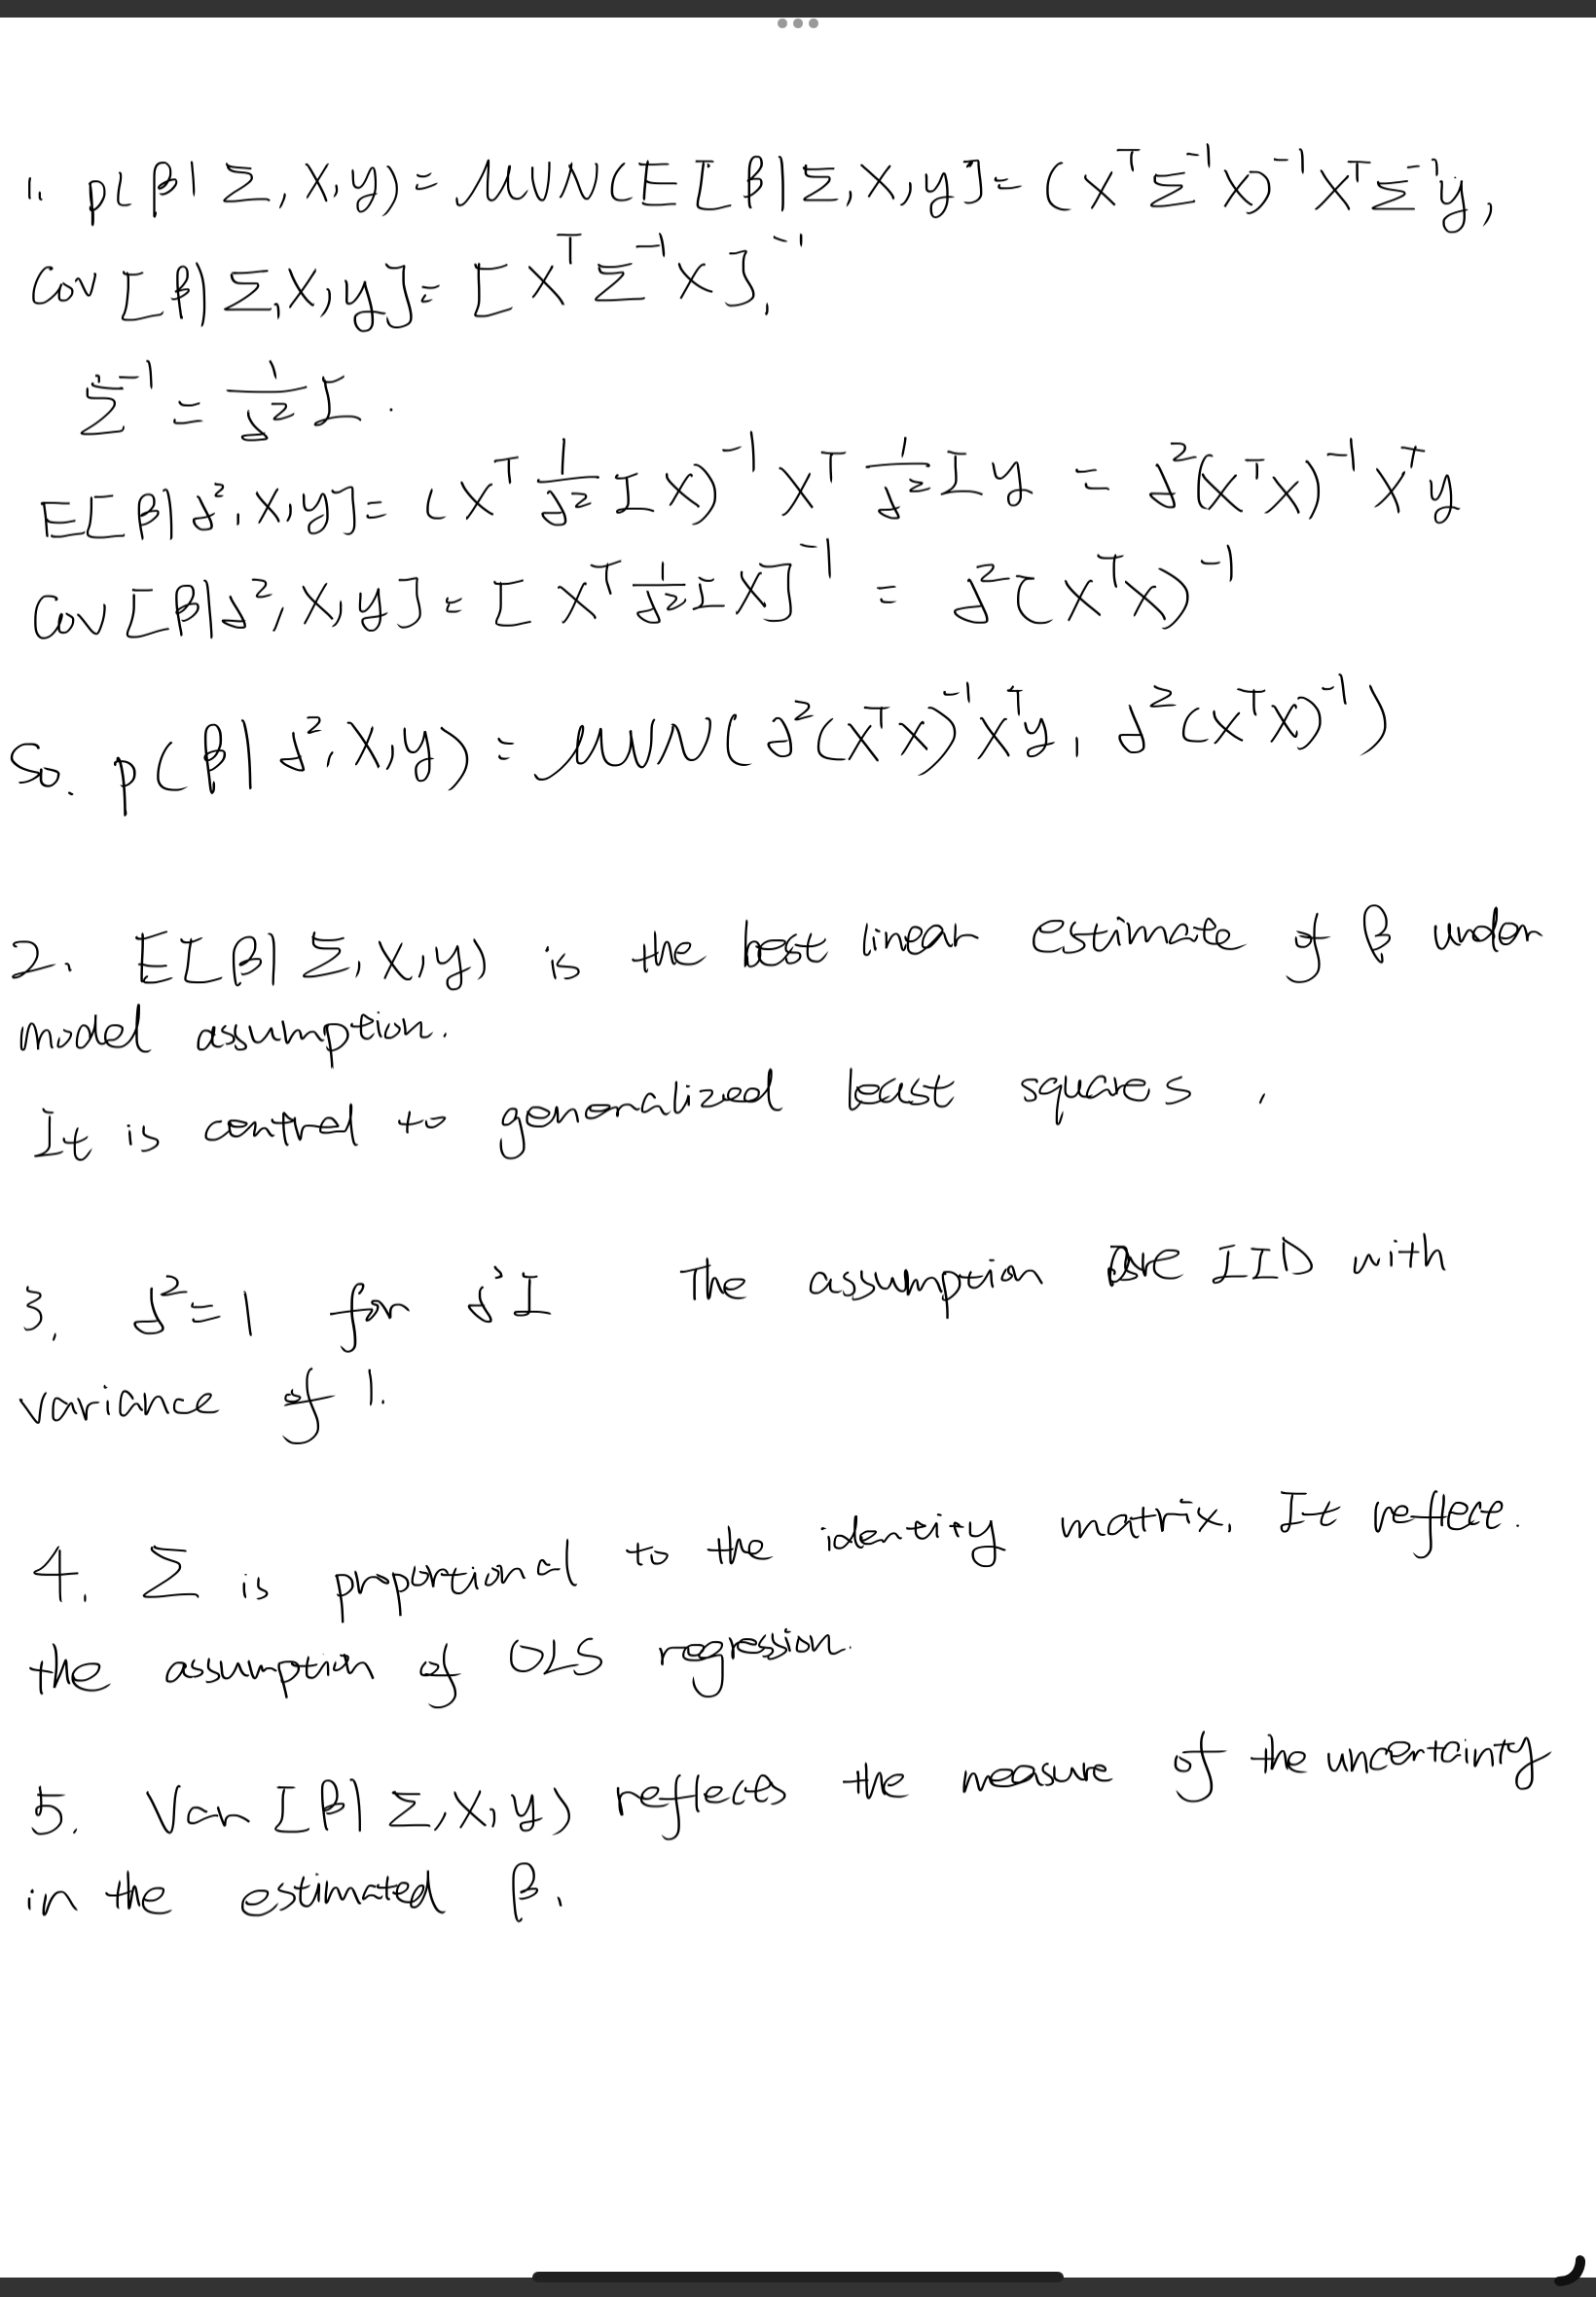

PART 3

In [9]:
import numpy as np; from scipy import stats;import pymc as pm

y = data.iloc[:, :10].values
n, p = y.shape

with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=p), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    mu = pm.MvNormal('mu', mu=np.zeros(p), cov=np.eye(p), shape=p)
    y_obs = pm.MvNormal('y_obs', mu=mu, chol=L, observed=y)
with MNV_LKJ:
    idata = pm.sample()

/usr/local/lib/python3.10/dist-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()


In [18]:
import arviz as az
y = data[['Weight', 'Height', 'Abdomen']].to_numpy()
p = y.shape[1]

with pm.Model() as model:

    mu = pm.Normal('mu', mu=0, sigma=5, shape=p)

    sd_dist = pm.HalfNormal.dist(sigma=2.5, shape=p)

    chol, corr, stds = pm.LKJCholeskyCov('chol', n=p, eta=2, sd_dist=sd_dist, compute_corr=True)

    y_obs = pm.MvNormal('y_obs', mu=mu, chol=chol, observed=y)
with model:
    trace = pm.sample(1000, tune=1000, target_accept=0.95, return_inferencedata=True)
